In [ ]:
# Use wine quality dataset, preprocess it and apply KNN algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

In [4]:
print("Dataset shape:", wine_data.shape)
print("\nFirst few rows:")
print(wine_data.head())

Dataset shape: (1599, 12)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


Class distribution:
quality
1    855
0    744
Name: count, dtype: int64


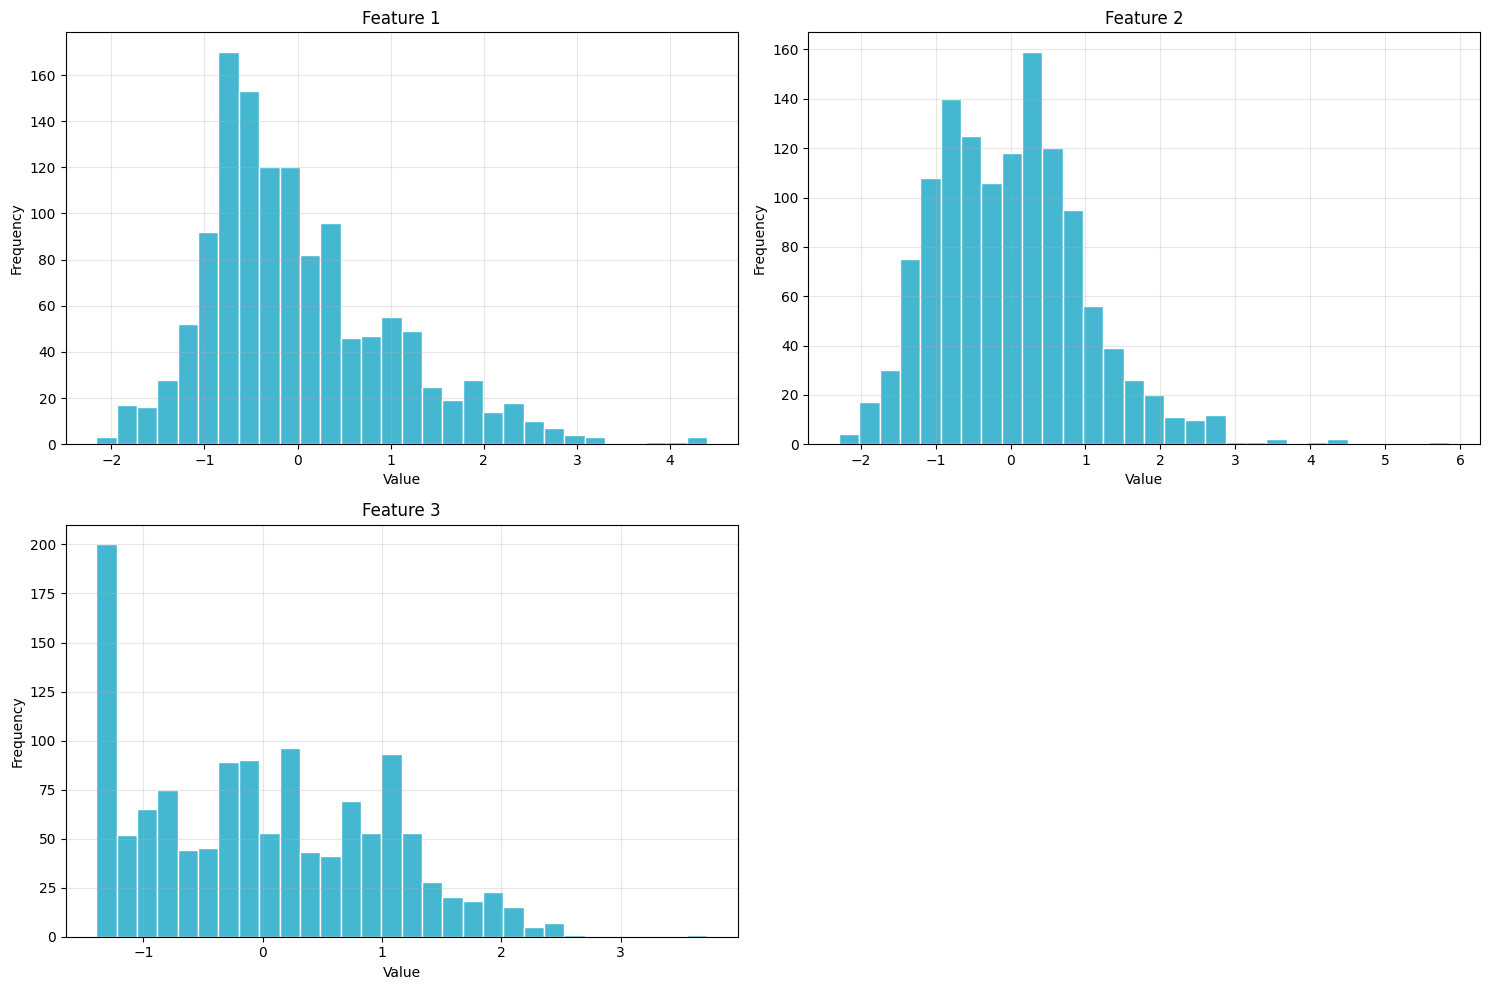


Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       141
           1       0.72      0.78      0.75       179

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.71      0.70       320



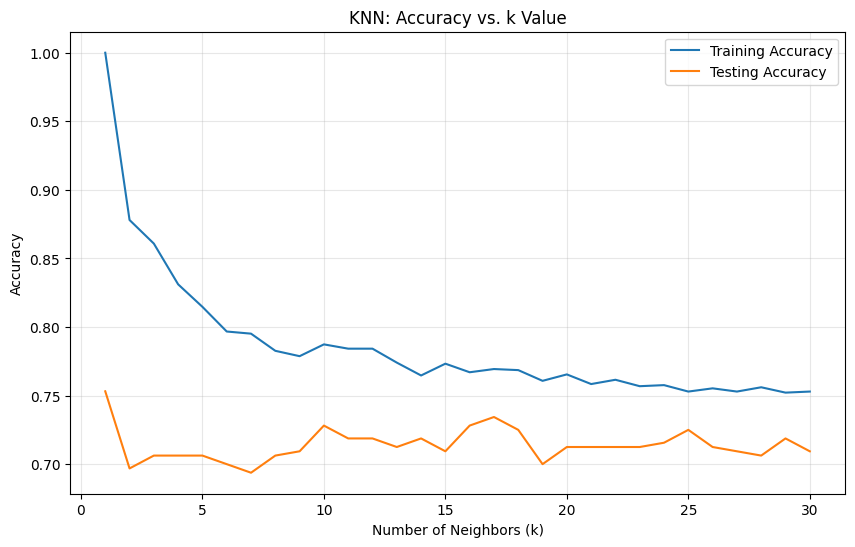


Optimal k value: 1
Best accuracy: 0.75


In [5]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

y_binary = (y > 5).astype(int)
print("\nClass distribution:")
print(y_binary.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(X_train_scaled_df.iloc[:, 0], bins=30, color='#45B7D1', edgecolor='white')
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(X_train_scaled_df.iloc[:, 1], bins=30, color='#45B7D1', edgecolor='white')
plt.title('Feature 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(X_train_scaled_df.iloc[:, 2], bins=30, color='#45B7D1', edgecolor='white')
plt.title('Feature 3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


k_values = range(1, 31)
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    train_accuracy.append(knn.score(X_train_scaled, y_train))


    test_accuracy.append(knn.score(X_test_scaled, y_test))


plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. k Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_k = k_values[np.argmax(test_accuracy)]
print(f"\nOptimal k value: {best_k}")
print(f"Best accuracy: {max(test_accuracy):.2f}")
